<a href="https://colab.research.google.com/github/mariacmartins/shepy/blob/main/Aula_10_Introdu%C3%A7%C3%A3o_%C3%A0_Vis%C3%A3o_Computacional_shePY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introdução à Visão Computacional

### Entendendo conceitos de imagem e padrão RGB
Uma imagem pode ser representada como um array de números/matriz. Cada célula dessa matriz é um **pixel** (menor unidade de informação que compõe uma imagem digital), que no caso de uma imagem preto e branca possui um valor de 0 a 255, sendo 0 para preto e 255 para branco. O *range* (intervalo) 0 a 255 tem a ver como os computadores guardam números. Mas você também pode dividir os valores por 255 para normalizar os valores entre 0 e 1. Em uma imagem preta e branca temos apenas um canal, ou seja, uma matriz de 2 dimensões.

Já Uma imagem colorida, por exemplo, é composta por uma matriz de 3 dimensões (3 canais), contendo em cada canal, uma das cores do padrão **RGB (RED - Vermelho, GREEN - Verde, BLUE - Azul)**. Ou seja, em imagens coloridas temos uma matriz formada por três matrizes de duas dimensões, cada uma representando uma das cores do sistema RGB.
Isso permite a produção de uma variedade de cores. Portanto, no sistema RGB temos por exemplo:
- Branco: RGB (255,255,255)
- Azul: RGB (0,0,255)
- Vermelho: RGB (255,0,0)
- Verde: RGB (0,255,0)
- Preto: RGB (0,0,0)

OBS: Em programação, um array é uma estrutura de dados que armazena uma coleção de elementos de tal forma que cada um dos elementos possa ser identificado, por exemplo, por um índice.

<img src="https://miro.medium.com/max/693/1*bV7S0zACdidh11ikjYpLpQ.png" width="550" height="250">
<img src="https://brohrer.github.io/images/image_processing/three_d_array.png" width="300" height="300">

## O que é visão computacional?
Dar a capacidade de "enxergar" à uma máquina.

### Problemas de interesse da visão computacional:
- Detecção: Encontrar um determinado objeto dentro de uma imagem.
- Reconhecimento: Além de detectar, reconhecer uma coisa como algo que já se conhece. Ex: reconhecimento facial.
- Segmentação: Poder separar uma imagem uma determinada coisa. Ex: separação de fundo da imagem.
- Análise de movimento: Reconhecer se algo está parado ou não.
- Reconstrução 3D: Estimar algo em formato 3D.

### Entendendo imagens de forma prática:

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
blank_img = np.zeros(shape=(501, 501, 3), dtype=np.int16)

In [ ]:
blank_img.ndim

3

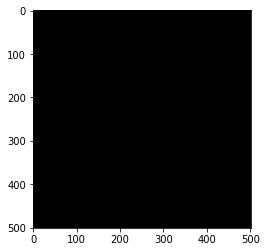

In [ ]:
plt.imshow(blank_img)

In [ ]:
type(blank_img)

numpy.ndarray

In [ ]:
blank_img.fill(255)

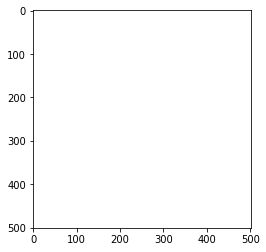

In [ ]:
plt.imshow(blank_img)

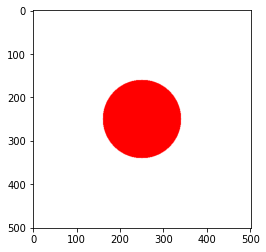

In [ ]:
#Desenhando algo similar à bandeira do Japão
cv2.circle(blank_img, center=(250,250), radius=90, color=(255,0,0), thickness=-1)
plt.imshow(blank_img)

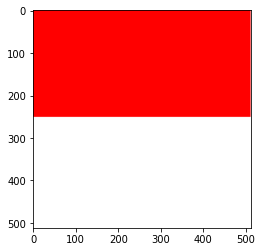

In [ ]:
#Bandeira da indonésia
# pt1: representa as posições do ponto do topo esquerdo do retângulo 
# pt2: representa as posições do ponto do canto direito inferior do retângulo 

bandeira = np.zeros(shape=(512, 512, 3), dtype=np.int16)
bandeira.fill(255)

cv2.rectangle(bandeira, pt1=(0, 0), pt2=(510, 250),color=(255, 0, 0), thickness=-1)
plt.imshow(bandeira)

### Lendo arquivos de imagens:

In [ ]:
img = cv2.imread('friends.jpg')

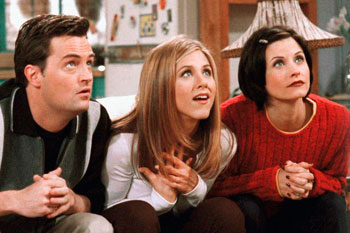

In [ ]:
cv2_imshow(img) 

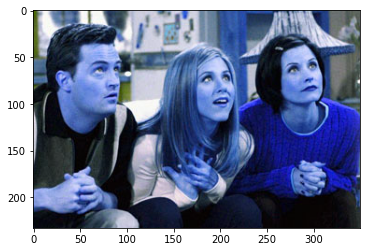

In [ ]:
#Mostrando a imagem com matplotlib
plt.imshow(img)

A imagem sai em tom azulado porque o openCV e o matplotlib esperam diferentes ordens dos canais RGB.
- O matplotlib lê na ordem RGB (Red, Green, Blue)
- O openCV lê na ordem BGR (Blue, Green e Red)
Precisamos transformar em um modo que o matplotlib espera. 

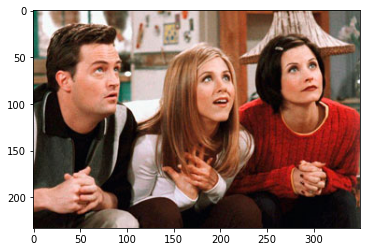

In [ ]:
fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(fix_img)

In [ ]:
fix_img.shape

(233, 350, 3)

In [ ]:
gray = cv2.cvtColor(fix_img, cv2.COLOR_RGB2GRAY)

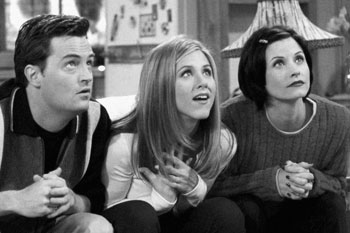

In [ ]:
cv2_imshow(gray)

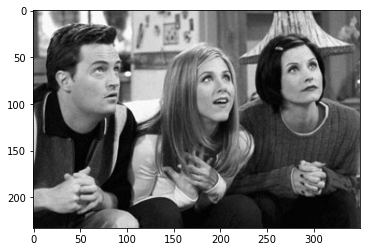

In [ ]:
plt.imshow(gray, cmap='gray')

In [ ]:
gray.shape

(233, 350)

In [ ]:
gray.ndim

2

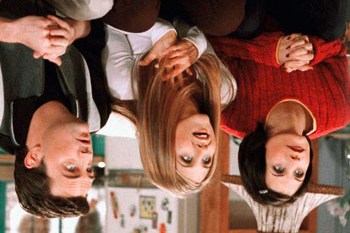

In [ ]:
#invertendo a imagem
flip_img = cv2.flip(img, 0)
cv2_imshow(flip_img)

In [ ]:
#salvando a imagem virada
cv2.imwrite('flip_img.jpg', flip_img)

True

## Introdução a detecção de objetos

### Template Matching: 
Simplesmente verifica uma imagem maior para um modelo fornecido, deslizando a imagem de destino do modelo pela imagem maior.


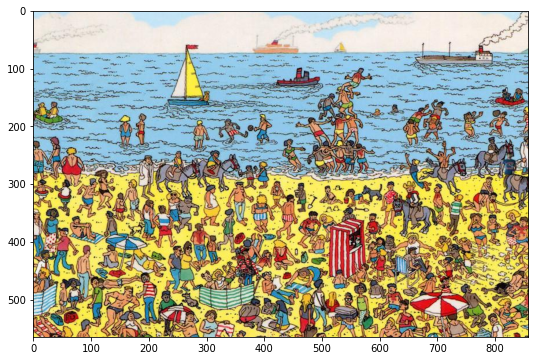

In [ ]:
plt.figure(figsize=(10, 6))
full = cv2.imread('wally.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

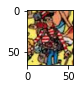

In [ ]:
plt.figure(figsize=(2, 1))

face = cv2.imread('wallyfound.png')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

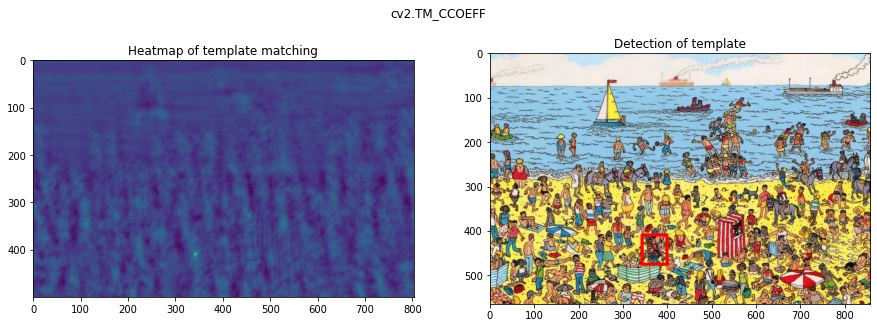

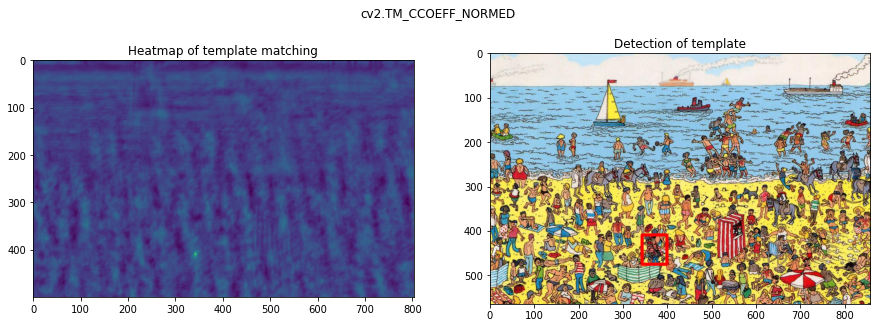

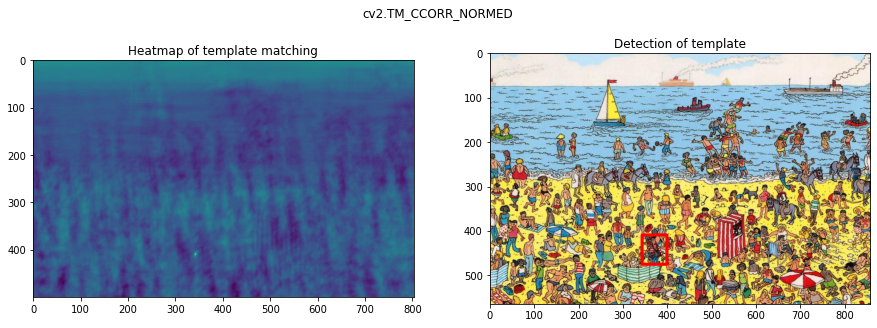

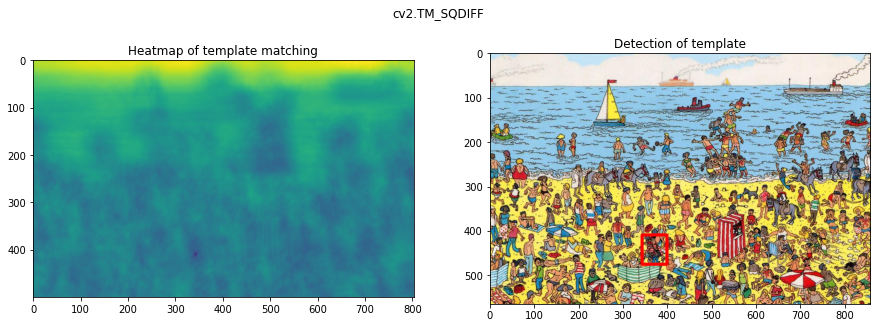

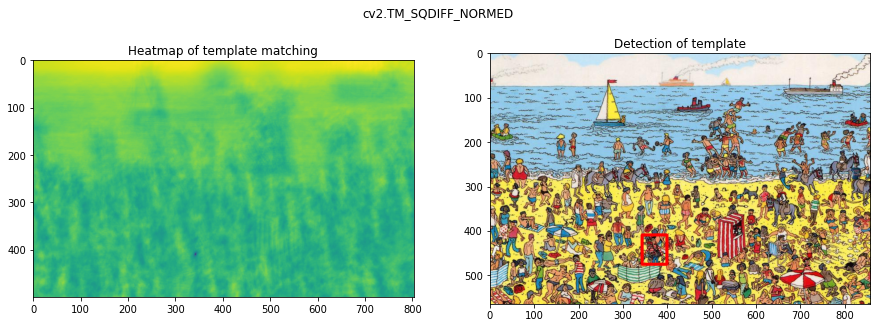

In [ ]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for m in methods:
    #criando uma cópia
    full_copy = full.copy()
    method = eval(m)
    
    #template matching
    res = cv2.matchTemplate(full_copy, face, method)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res) #para encontrar os valores máximo e mínimo (bem como suas posições) em uma determinada matriz
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else: 
        top_left = max_loc
        
    height, width, channels = face.shape
    
    bottom_right = (top_left[0]+width, top_left[1]+height)
    
    cv2.rectangle(full_copy, top_left, bottom_right, (255, 0, 0), 5)
    
    #plotando as imagens
    plt.figure(figsize=(15, 5))

    plt.subplot(121)
    plt.imshow(res)
    plt.title('Heatmap of template matching')  

    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection of template')
    plt.suptitle(m)

    
    plt.show()